In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
from sklearn.preprocessing import StandardScaler, scale, RobustScaler, robust_scale

In [2]:
df = pd.read_csv('datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print('age median: ', np.median(df['Age'].values))
print('age variance: ', np.var(df['Age'].values))

age median:  29.0
age variance:  138.12296379937067


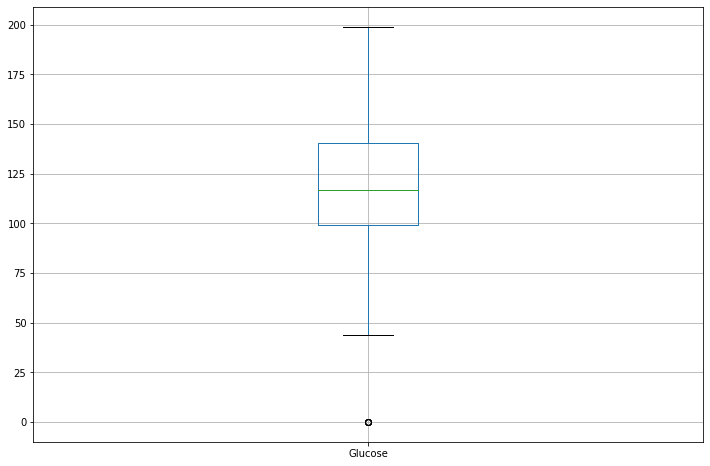

In [6]:
df.boxplot(column= ['Glucose'], figsize= (12,8))
plt.show()

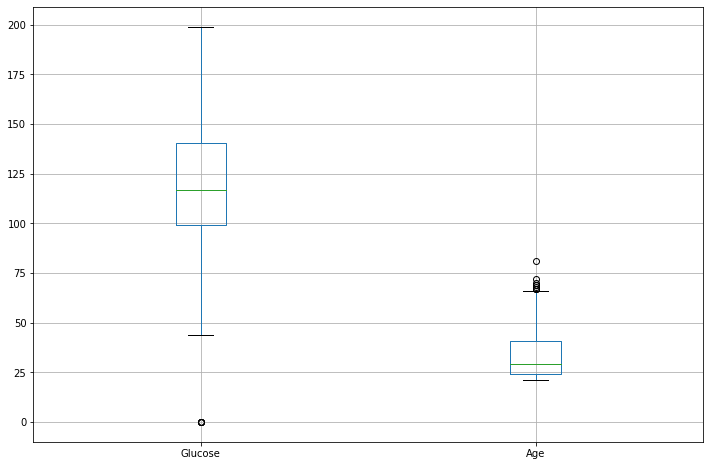

In [7]:
df.boxplot(column= ['Glucose', 'Age'], figsize= (12,8))
plt.show()

### standard scaling

In [8]:
outcome = df['Outcome']
df = df.drop(['Outcome'], axis= 1)

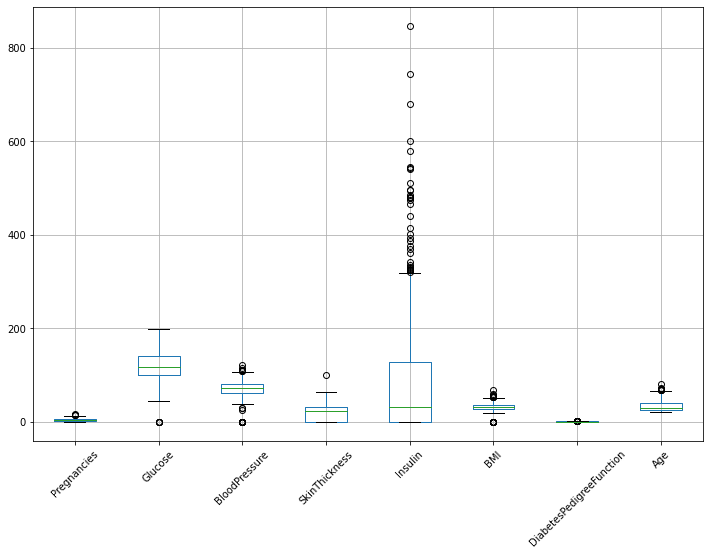

In [9]:
df.boxplot(figsize=(12,8), rot= 45)
plt.show()

**manual scaling**

In [10]:
df_scaled = pd.DataFrame()

In [11]:
for column in df:
    df_scaled[column] = ( df[column] - np.mean(df[column].values))/ np.std(df[column].values)
    
df_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


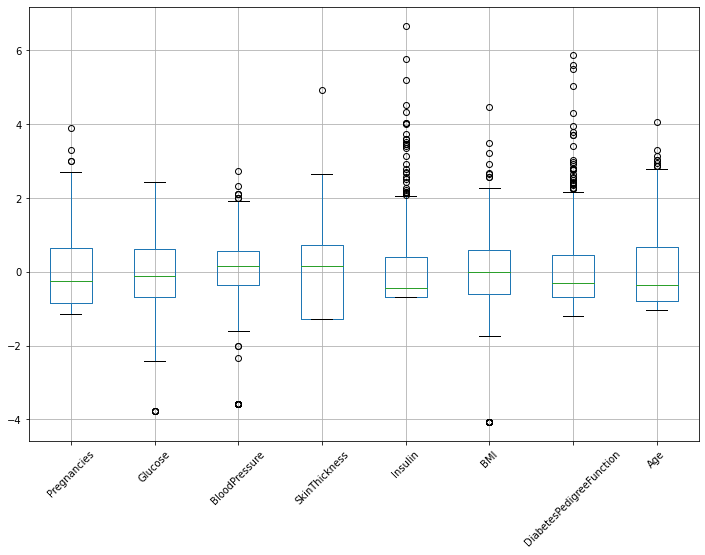

In [12]:
df_scaled.boxplot(figsize=(12,8), rot= 45)
plt.show()

In [13]:
std_scaler = StandardScaler(copy= True,
                            with_mean= True,
                            with_std= True)

In [14]:
std_scaled_df = std_scaler.fit_transform(df)
std_scaled_df = pd.DataFrame(std_scaled_df, columns= df.columns)

std_scaled_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


In [15]:
std_scaler.mean_

array([  3.84505208, 120.89453125,  69.10546875,  20.53645833,
        79.79947917,  31.99257812,   0.4718763 ,  33.24088542])

In [16]:
std_scaler.var_

array([1.13392724e+01, 1.02091726e+03, 3.74159449e+02, 2.54141900e+02,
       1.32638869e+04, 6.20790465e+01, 1.09635697e-01, 1.38122964e+02])

In [17]:
std_scaler.scale_

array([  3.36738361,  31.95179591,  19.34320163,  15.94182863,
       115.16894926,   7.87902573,   0.33111282,  11.75257265])

In [18]:
std_scaled_df['Outcome'] = outcome

std_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


### robust scaling

In [19]:
robust_scaled = pd.DataFrame(robust_scale(df),
                             columns= df.columns)
robust_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294


In [20]:
robust_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.169010,0.094413,-0.160807,-0.076986,0.387422,-0.000798,0.259807,0.249464
std,0.673916,0.775094,1.075323,0.498507,0.905650,0.847759,0.866219,0.691778
min,-0.600000,-2.836364,-4.000000,-0.718750,-0.239686,-3.440860,-0.769935,-0.470588
25%,-0.400000,-0.436364,-0.555556,-0.718750,-0.239686,-0.505376,-0.336601,-0.294118
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.563636,0.444444,0.281250,0.760314,0.494624,0.663399,0.705882
max,2.800000,1.987879,2.777778,2.375000,6.408644,3.774194,5.352941,3.058824


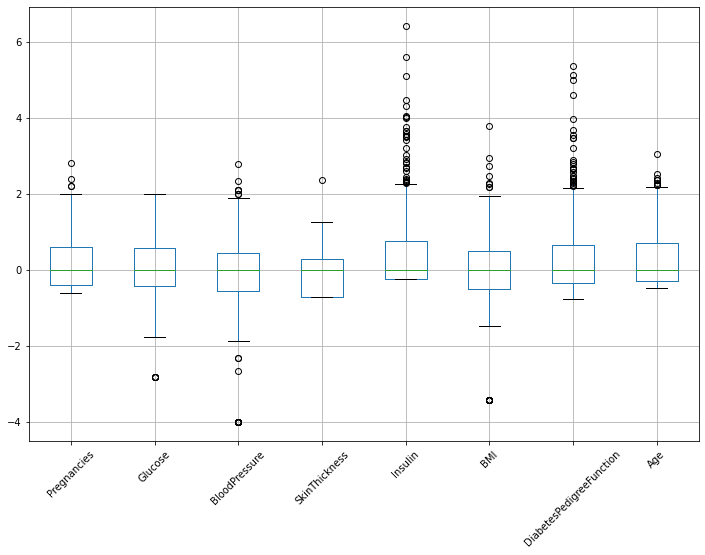

In [21]:
robust_scaled.boxplot(figsize=(12,8), rot= 45)
plt.show()

In [22]:
robust_scaler = RobustScaler(copy= True,
                             with_centering= True,
                             with_scaling= True)
robust_scaled2 = robust_scaler.fit_transform(df)
robust_scaled2 = pd.DataFrame(robust_scaled2, columns= df.columns)

### normalization

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import Normalizer, normalize

In [24]:
l2_normalized = pd.DataFrame(normalize(df, norm='l2'),
                             columns= df.columns)

In [25]:
l2_normalized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


In [26]:
#verifying
squares = l2_normalized.iloc[0].pow(2)
math.sqrt(squares.sum())

1.0

In [27]:
math.sqrt(l2_normalized.iloc[111].pow(2).sum())

0.9999999999999999

In [28]:
l1_normalized = pd.DataFrame(normalize(df, norm='l1'),
                             columns= df.columns)
l1_normalized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.017380,0.428703,0.208558,0.101383,0.000000,0.097327,0.001816,0.144832
1,0.004185,0.355721,0.276207,0.121364,0.000000,0.111320,0.001469,0.129734
2,0.025726,0.588477,0.205806,0.000000,0.000000,0.074926,0.002161,0.102903
3,0.003103,0.276169,0.204799,0.071369,0.291684,0.087195,0.000518,0.065163
4,0.000000,0.298873,0.087262,0.076355,0.366502,0.094025,0.004991,0.071991


In [29]:
#verifying
l1_normalized.iloc[134].abs().sum()

1.0000000000000002

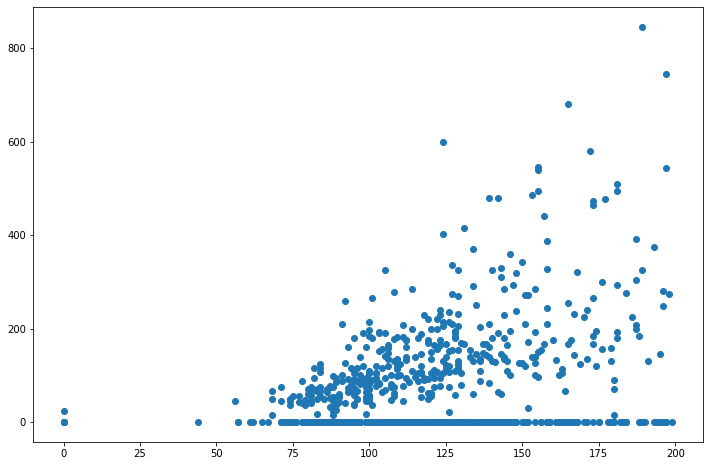

In [30]:
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(df['Glucose'], df['Insulin'])
plt.show()

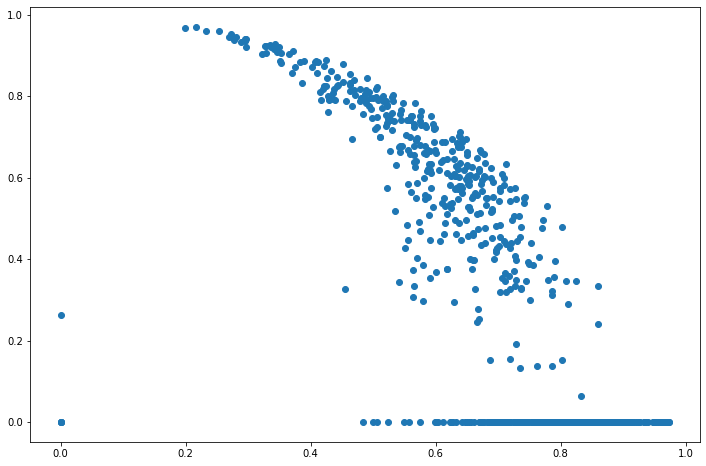

In [31]:
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(l2_normalized['Glucose'], l2_normalized['Insulin'])
plt.show()

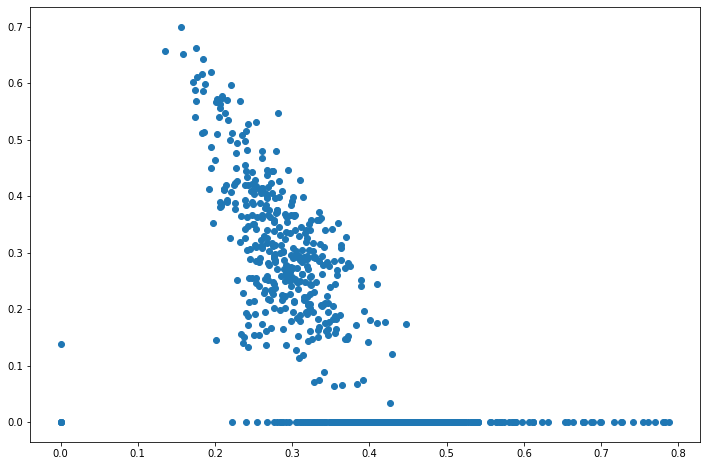

In [32]:
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(l1_normalized['Glucose'], l1_normalized['Insulin'])
plt.show()

In [33]:
max_normalized = pd.DataFrame(normalize(df, norm='max'),
                             columns= df.columns)
max_normalized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.040541,1.000000,0.486486,0.236486,0.0,0.227027,0.004236,0.337838
1,0.011765,1.000000,0.776471,0.341176,0.0,0.312941,0.004129,0.364706
2,0.043716,1.000000,0.349727,0.000000,0.0,0.127322,0.003672,0.174863
3,0.010638,0.946809,0.702128,0.244681,1.0,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.0,0.256548,0.013619,0.196429


In [34]:
max_normalized_fe_vector = df.iloc[0]/df.iloc[0].max()
max_normalized_fe_vector

Pregnancies                 0.040541
Glucose                     1.000000
BloodPressure               0.486486
SkinThickness               0.236486
Insulin                     0.000000
BMI                         0.227027
DiabetesPedigreeFunction    0.004236
Age                         0.337838
Name: 0, dtype: float64

**cosine similarity**

In [35]:
df.iloc[[8,10,11]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
8,2,197,70,45,543,30.5,0.158,53
10,4,110,92,0,0,37.6,0.191,30
11,10,168,74,0,0,38.0,0.537,34


In [36]:
cosine_similarity(df.iloc[10].values.reshape(1,-1),
                  df.iloc[11].values.reshape(1,-1))
#high similarity

array([[0.96221582]])

In [37]:
cosine_similarity(df.iloc[8].values.reshape(1,-1),
                  df.iloc[10].values.reshape(1,-1))
#low similarity

array([[0.34751949]])